In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [10]:
engine = create_engine("sqlite:///mammals.sqlite", echo=False)

In [11]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
MammalMasses = Base.classes.mammal_masses_MammalMasses
session = Session(engine)

In [12]:
# USE `group_by` to list all of the continents
### BEGIN SOLUTION
session.query(MammalMasses.continent).group_by(MammalMasses.continent).all()
### END SOLUTION

[('AF'), ('AUS'), ('Af'), ('EA'), ('Insular'), ('NA'), ('Oceanic'), ('SA')]

In [13]:
MammalMasses.__table__

Table('mammal_masses_MammalMasses', MetaData(bind=None), Column('record_id', INTEGER(), table=<mammal_masses_MammalMasses>, primary_key=True, nullable=False), Column('continent', TEXT(length=20), table=<mammal_masses_MammalMasses>), Column('status', TEXT(length=20), table=<mammal_masses_MammalMasses>), Column('sporder', TEXT(length=20), table=<mammal_masses_MammalMasses>), Column('family', TEXT(length=20), table=<mammal_masses_MammalMasses>), Column('genus', TEXT(length=20), table=<mammal_masses_MammalMasses>), Column('species', TEXT(length=20), table=<mammal_masses_MammalMasses>), Column('log_mass_g', REAL(), table=<mammal_masses_MammalMasses>), Column('comb_mass_g', REAL(), table=<mammal_masses_MammalMasses>), Column('reference', TEXT(), table=<mammal_masses_MammalMasses>), schema=None)

In [5]:
# Top 10 Largest Mammals in North America still existing
# ordered in descending order by mass (g).
### BEGIN SOLUTION
from sqlalchemy import func
sel = [MammalMasses.continent, MammalMasses.family, 
       MammalMasses.genus, MammalMasses.species, MammalMasses.comb_mass_g]
results = session.query(*sel).\
    filter(MammalMasses.continent == "NA").\
    filter(MammalMasses.status == "extant").\
    filter(MammalMasses.comb_mass_g != None).\
    order_by(MammalMasses.comb_mass_g.desc()).all()
print(results[:10])


# Alternative solution using the `limit` function
from sqlalchemy import func
results = session.query(*sel).\
    filter(MammalMasses.continent == "NA").\
    filter(MammalMasses.status == "extant").\
    filter(MammalMasses.comb_mass_g != None).\
    order_by(MammalMasses.comb_mass_g.desc()).limit(10).all()
### END SOLUTION

[('NA', 'Odobenidae', 'Odobenus', 'rosmarus', 825000.0), ('NA', 'Phocidae', 'Mirounga', 'angustirostris', 750000.0), ('NA', 'Bovidae', 'Bison', 'bison', 579255.3), ('NA', 'Trichechidae', 'Trichechus', 'manatus', 433333.0), ('NA', 'Bovidae', 'Ovibos', 'moschatus', 368502.1), ('NA', 'Cervidae', 'Alces', 'alces', 358996.3), ('NA', 'Ursidae', 'Ursus', 'maritimus', 352500.7), ('NA', 'Otariidae', 'Eumetopias', 'jubatus', 310000.0), ('NA', 'Tapiridae', 'Tapirus', 'bairdii', 299999.1), ('NA', 'Phocidae', 'Erignathus', 'barbatus', 280000.0)]


In [6]:
# Calculate the Average Combined Mass of Mammals in Africa
# Ignore Null fields
# Only Calculate for "extant" (currently existing) mammals
### BEGIN SOLUTION
avg_comb_mass_af = session.query(func.avg(MammalMasses.comb_mass_g)).\
    filter(MammalMasses.status == "extant").\
    filter(MammalMasses.comb_mass_g != None).\
    filter(MammalMasses.continent == "AF").scalar()
avg_comb_mass_af
### END SOLUTION

31794.525730180805

In [14]:
# Calculate the Average Combined Mass of Mammals per Continent for extant species and
# exclude the Oceanic continent
### BEGIN SOLUTION
average_per_continent = session.query(MammalMasses.continent, 
                                      func.avg(MammalMasses.comb_mass_g)).\
    filter(MammalMasses.status == "extant").\
    filter(MammalMasses.comb_mass_g != None).\
    filter(MammalMasses.continent != 'Oceanic').\
    group_by(MammalMasses.continent).all()
average_per_continent
### END SOLUTION

[('AF', 31794.525730180805),
 ('AUS', 17484.882608695647),
 ('EA', 36413.19457236843),
 ('Insular', 12431.589628820964),
 ('NA', 11071.727358490578),
 ('SA', 4126.67529274004)]

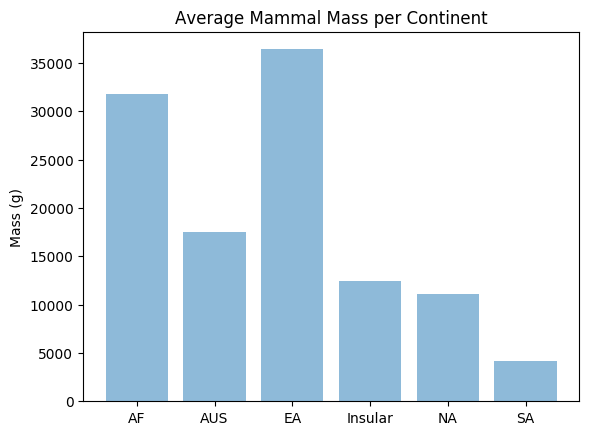

In [20]:
# BONUS: Use matplotlib to generate a histograph of the Average Mammal Size per Continent
# using the previous query results. 
### BEGIN SOLUTION
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# get the y positions
y_pos = np.arange(len(average_per_continent))

# get the averages for each continent
avgs = [x[1] for x in average_per_continent]

# come up with the names for the x axis ticks
xticks = [x[0] for x in average_per_continent]
 
plt.bar(y_pos, avgs, align='center', alpha=0.5) #puts the bar down
plt.xticks(y_pos, xticks) # this puts the words down on the x axis instead of 0,1,2,3...
plt.ylabel('Mass (g)') #gives the y axis a label
plt.title('Average Mammal Mass per Continent') #gives a title for the visualization
 
plt.show()
### END SOLUTION